In [1]:
!pip install librosa tensorflow matplotlib

In [2]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from keras.layers import Dense, Dropout, Flatten
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import BatchNormalization

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_path = "/content/drive/My Drive/DeepLearning/code/dataset/"

X_train = np.load(data_path + 'X_train.npy')
X_val = np.load(data_path + 'X_val.npy')
X_test = np.load(data_path + 'X_test.npy')
y_train = np.load(data_path + 'y_train.npy')
y_val = np.load(data_path + 'y_val.npy')
y_test = np.load(data_path + 'y_test.npy')
X_train_da = np.load(data_path + 'X_train_da.npy')
y_train_da = np.load(data_path + 'y_train_da.npy')

In [5]:
model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## Baseline FNN
###Train

In [13]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/50
88/88 [==============================] - 8s 45ms/step - loss: 0.9042 - accuracy: 0.6260 - val_loss: 2.0095 - val_accuracy: 0.7020
Epoch 2/50
88/88 [==============================] - 3s 37ms/step - loss: 0.6477 - accuracy: 0.7137 - val_loss: 0.5508 - val_accuracy: 0.7450
Epoch 3/50
88/88 [==============================] - 4s 40ms/step - loss: 0.5405 - accuracy: 0.7649 - val_loss: 0.5490 - val_accuracy: 0.7593
Epoch 4/50
88/88 [==============================] - 3s 36ms/step - loss: 0.4965 - accuracy: 0.7774 - val_loss: 0.5315 - val_accuracy: 0.7708
Epoch 5/50
88/88 [==============================] - 3s 32ms/step - loss: 0.4900 - accuracy: 0.7799 - val_loss: 0.5335 - val_accuracy: 0.7536
Epoch 6/50
88/88 [==============================] - 3s 35ms/step - loss: 0.4570 - accuracy: 0.7963 - val_loss: 0.4972 - val_accuracy: 0.7708
Epoch 7/50
88/88 [==============================] - 4s 42ms/step - loss: 0.4352 - accuracy: 0.8014 - val_loss: 0.4767 - val_accuracy: 0.7851
Epoch 8/50
88

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

11/11 [==============================] - 0s 13ms/step - loss: 0.4583 - accuracy: 0.8029
Test accuracy: 0.8028571605682373
11/11 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       252
           1       0.73      0.47      0.57        98

    accuracy                           0.80       350
   macro avg       0.77      0.70      0.72       350
weighted avg       0.79      0.80      0.79       350



### Evaluation

11/11 [==============================] - 0s 13ms/step - loss: 0.4583 - accuracy: 0.8029
Test Accuracy: 80.29%


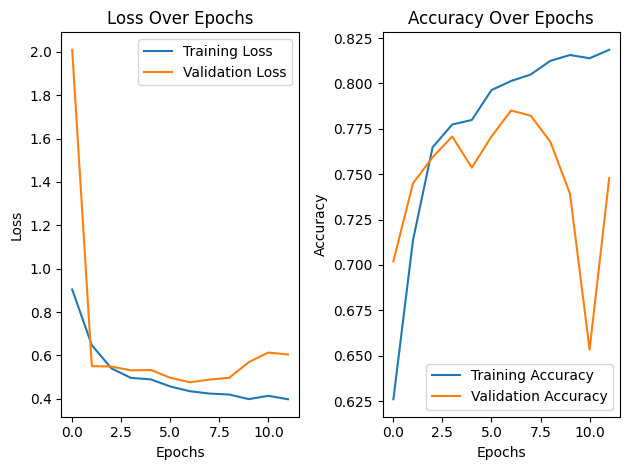

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

11/11 [==============================] - 0s 14ms/step


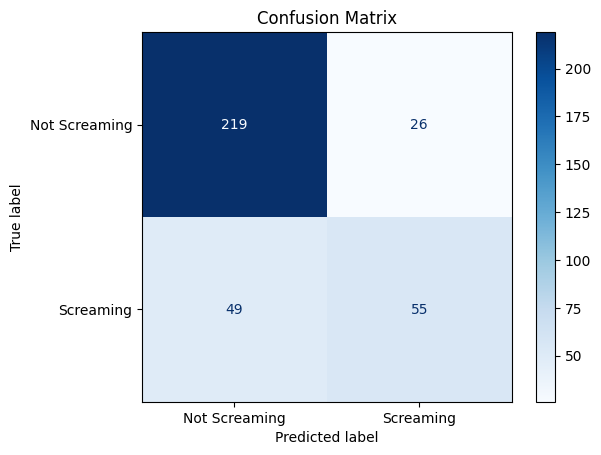

In [17]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Training Performance: The training accuracy is gradually increasing, which indicates that the model is learning from the training data. However, the training loss is still relatively high, suggesting that the model may be struggling to fit the training data properly. This could be due to various factors such as model complexity, optimization algorithm, or insufficient training data.

Validation Performance: The validation accuracy is stable around 72%, which is the same as the accuracy achieved on the test set. However, the validation loss is relatively high, indicating that the model may be overfitting to some extent. Overfitting occurs when the model learns to memorize the training data rather than generalize well to unseen data.

Class Imbalance: The classification report shows that the model performs well in predicting the majority class (0 - not screaming) but poorly in predicting the minority class (1 - screaming). This is evident from the low precision, recall, and F1-score for the minority class. Since your dataset is imbalanced (2600 not screaming files vs. 800 screaming files), the model may be biased towards the majority class.

F1-score: The F1-score is an important metric to consider, especially for imbalanced datasets, as it provides a balanced measure of precision and recall. In this case, the F1-score for the minority class is 0, indicating that the model fails to correctly classify instances of the minority class.

### Proceed with training the model using the dataset that includes data augmentation.

In [6]:
history = model.fit(X_train_da, y_train_da,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/50
132/132 [==============================] - 12s 46ms/step - loss: 0.8222 - accuracy: 0.6513 - val_loss: 0.5111 - val_accuracy: 0.7564
Epoch 2/50
132/132 [==============================] - 4s 32ms/step - loss: 0.6245 - accuracy: 0.7145 - val_loss: 0.7395 - val_accuracy: 0.7221
Epoch 3/50
132/132 [==============================] - 4s 31ms/step - loss: 0.5447 - accuracy: 0.7340 - val_loss: 0.5576 - val_accuracy: 0.7650
Epoch 4/50
132/132 [==============================] - 5s 39ms/step - loss: 0.5112 - accuracy: 0.7580 - val_loss: 0.4930 - val_accuracy: 0.7564
Epoch 5/50
132/132 [==============================] - 4s 32ms/step - loss: 0.4901 - accuracy: 0.7675 - val_loss: 0.6030 - val_accuracy: 0.7450
Epoch 6/50
132/132 [==============================] - 4s 31ms/step - loss: 0.4830 - accuracy: 0.7705 - val_loss: 0.5278 - val_accuracy: 0.7421
Epoch 7/50
132/132 [==============================] - 5s 39ms/step - loss: 0.4672 - accuracy: 0.7815 - val_loss: 0.4698 - val_accuracy: 0.770

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

11/11 [==============================] - 0s 11ms/step - loss: 0.4619 - accuracy: 0.7714
Test accuracy: 0.7714285850524902
11/11 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.84       252
           1       0.60      0.53      0.57        98

    accuracy                           0.77       350
   macro avg       0.72      0.70      0.71       350
weighted avg       0.76      0.77      0.77       350



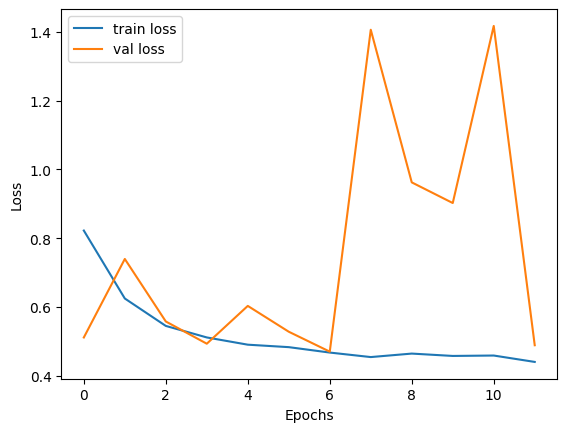

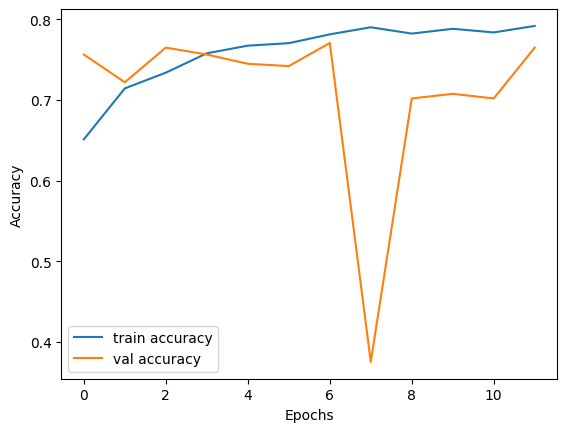

In [8]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

11/11 [==============================] - 0s 13ms/step


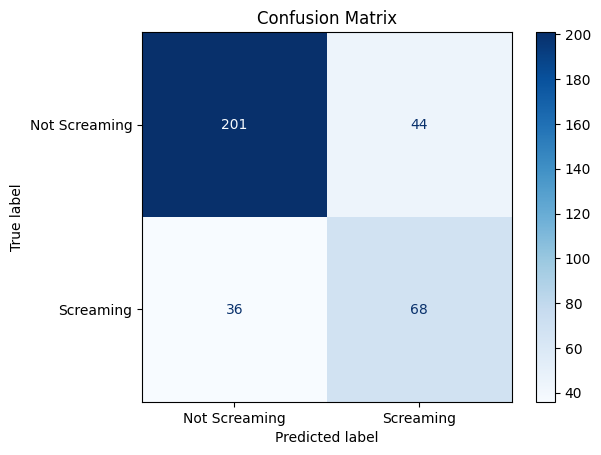

In [9]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Train the model with Weight Loss Function

In [10]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights = dict(enumerate(class_weights))

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights,
                    callbacks=[early_stopping])

Epoch 1/50
88/88 [==============================] - 6s 56ms/step - loss: 0.4740 - accuracy: 0.7720 - val_loss: 0.6545 - val_accuracy: 0.7307
Epoch 2/50
88/88 [==============================] - 3s 32ms/step - loss: 0.4644 - accuracy: 0.7641 - val_loss: 1.7176 - val_accuracy: 0.3610
Epoch 3/50
88/88 [==============================] - 3s 36ms/step - loss: 0.4503 - accuracy: 0.7806 - val_loss: 0.4900 - val_accuracy: 0.7765
Epoch 4/50
88/88 [==============================] - 3s 32ms/step - loss: 0.4352 - accuracy: 0.7813 - val_loss: 0.6323 - val_accuracy: 0.6848
Epoch 5/50
88/88 [==============================] - 3s 37ms/step - loss: 0.4192 - accuracy: 0.7946 - val_loss: 1.9667 - val_accuracy: 0.3295
Epoch 6/50
88/88 [==============================] - 3s 34ms/step - loss: 0.4357 - accuracy: 0.7899 - val_loss: 1.7377 - val_accuracy: 0.3668
Epoch 7/50
88/88 [==============================] - 3s 32ms/step - loss: 0.4175 - accuracy: 0.7895 - val_loss: 0.8181 - val_accuracy: 0.7192
Epoch 8/50
88

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

11/11 [==============================] - 0s 14ms/step - loss: 0.4840 - accuracy: 0.7771
Test accuracy: 0.7771428823471069
11/11 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       252
           1       0.81      0.27      0.40        98

    accuracy                           0.78       350
   macro avg       0.79      0.62      0.63       350
weighted avg       0.78      0.78      0.73       350



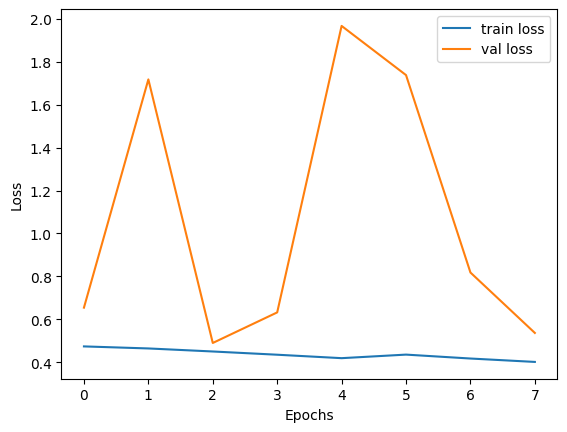

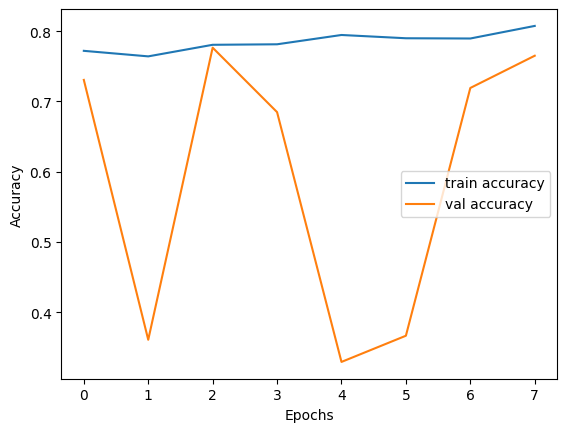

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

11/11 [==============================] - 0s 10ms/step


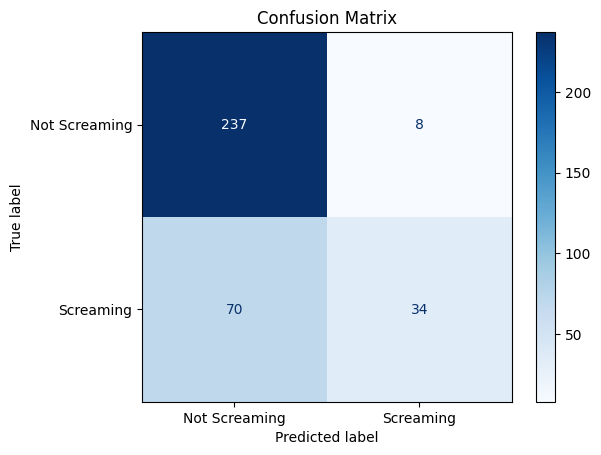

In [14]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Data Augmentaition + weights

In [6]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(np.argmax(y_train_da, axis=1)), y=np.argmax(y_train_da, axis=1))
class_weights = dict(enumerate(class_weights))

history = model.fit(X_train_da, y_train_da,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights,
                    callbacks=[early_stopping])

Epoch 1/50
132/132 [==============================] - 12s 44ms/step - loss: 0.8861 - accuracy: 0.6392 - val_loss: 0.4675 - val_accuracy: 0.7708
Epoch 2/50
132/132 [==============================] - 5s 35ms/step - loss: 0.6769 - accuracy: 0.6945 - val_loss: 0.4550 - val_accuracy: 0.7908
Epoch 3/50
132/132 [==============================] - 4s 31ms/step - loss: 0.5873 - accuracy: 0.7131 - val_loss: 0.4859 - val_accuracy: 0.7564
Epoch 4/50
132/132 [==============================] - 5s 37ms/step - loss: 0.5358 - accuracy: 0.7406 - val_loss: 0.4440 - val_accuracy: 0.7708
Epoch 5/50
132/132 [==============================] - 4s 33ms/step - loss: 0.5023 - accuracy: 0.7513 - val_loss: 0.4827 - val_accuracy: 0.7622
Epoch 6/50
132/132 [==============================] - 4s 31ms/step - loss: 0.4951 - accuracy: 0.7656 - val_loss: 0.6395 - val_accuracy: 0.6762
Epoch 7/50
132/132 [==============================] - 4s 34ms/step - loss: 0.4811 - accuracy: 0.7675 - val_loss: 0.5021 - val_accuracy: 0.730

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

11/11 [==============================] - 0s 11ms/step - loss: 0.4540 - accuracy: 0.8000
Test accuracy: 0.800000011920929
11/11 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       252
           1       0.72      0.47      0.57        98

    accuracy                           0.80       350
   macro avg       0.77      0.70      0.72       350
weighted avg       0.79      0.80      0.79       350



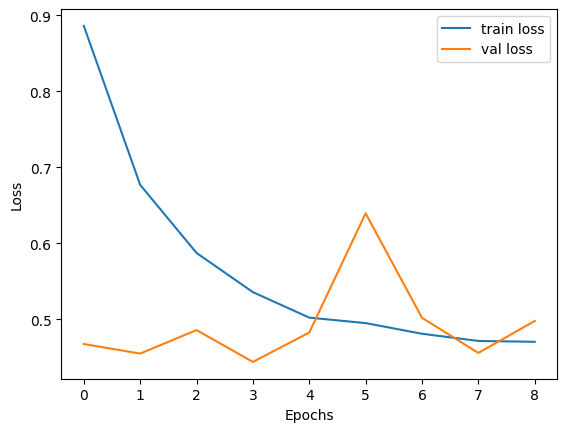

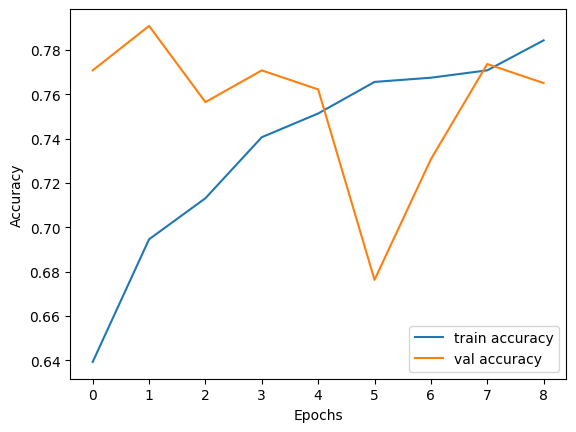

In [8]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

11/11 [==============================] - 0s 10ms/step


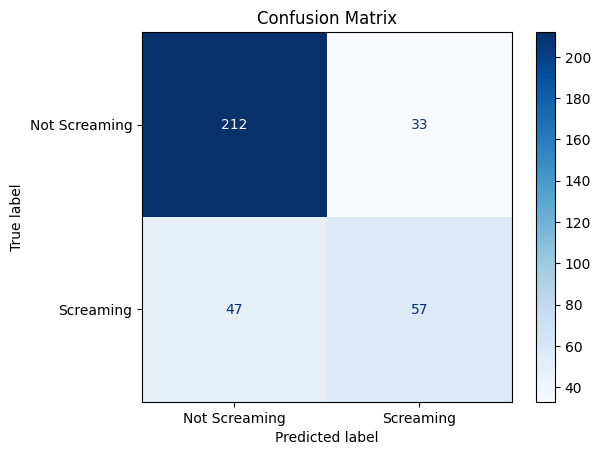

In [9]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()